# 1. PosteriorDB

See https://arxiv.org/abs/2407.04967v1

In [1]:
from random import sample
import os
from posteriordb import PosteriorDatabase
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pdb_path = f"{os.environ['MCMC_WORKDIR']}/posteriordb/posterior_database"
my_pdb = PosteriorDatabase(pdb_path)

In [3]:
posterior = my_pdb.posterior("kidiq-kidscore_momhsiq")

p_model = posterior.model
p_data = posterior.data

## 1.1. Accessing the data

In [4]:
p_data.information

{'name': 'kidiq',
 'keywords': ['ARM', 'Ch. 3', 'stan_examples'],
 'title': 'Cognitive test scores of three- and four-year-old children',
 'description': '  - N         : number of observations\n  - kid_score : cognitive test scores of three- and four-year-old children\n  - mom_hs    : did mother complete high school? 1: Yes, 0: No\n  - mom_iq    : mother IQ score\n  - mom_hs_new: new data for prediction\n  - mom_iq_new: new data for prediction',
 'urls': 'https://github.com/stan-dev/example-models/tree/master/ARM/Ch.3',
 'references': 'gelman2006data',
 'added_date': '2020-01-10',
 'added_by': 'Mans Magnusson'}

In [5]:
print(p_data.information["description"])

  - N         : number of observations
  - kid_score : cognitive test scores of three- and four-year-old children
  - mom_hs    : did mother complete high school? 1: Yes, 0: No
  - mom_iq    : mother IQ score
  - mom_hs_new: new data for prediction
  - mom_iq_new: new data for prediction


In [6]:
values_dict = p_data.values()
for key, vals in values_dict.items():
    print(f"{key}: {type(vals)}")

N: <class 'int'>
kid_score: <class 'list'>
mom_hs: <class 'list'>
mom_iq: <class 'list'>
mom_hs_new: <class 'int'>
mom_iq_new: <class 'int'>


In [7]:
data_df = pd.DataFrame(values_dict, columns=['kid_score', 'mom_hs', 'mom_iq'])
data_df

,kid_score,mom_hs,mom_iq
0,65,1,121.117529
1,98,1,89.361882
2,85,1,115.443165
3,83,1,99.449639
4,115,1,92.745710
...,...,...,...
429,94,0,84.877412
430,76,1,92.990392
431,50,0,94.859708
432,88,1,96.856624


In [8]:
data_df.describe()

,kid_score,mom_hs,mom_iq
count,434.000000,434.000000,434.000000
mean,86.797235,0.785714,100.000000
std,20.410688,0.410799,15.000000
min,20.000000,0.000000,71.037405
25%,74.000000,1.000000,88.660321
50%,90.000000,1.000000,97.915254
75%,102.000000,1.000000,110.272742
max,144.000000,1.000000,138.893106


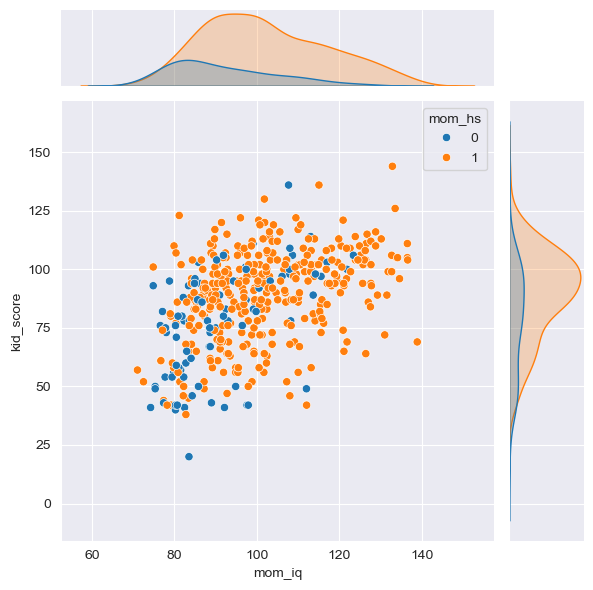

In [9]:
sns.jointplot(data_df, x="mom_iq", y="kid_score", hue="mom_hs")

## 1.2. Accessing the model

In [10]:
p_model.information

{'name': 'kidscore_momhsiq',
 'keywords': ['ARM', 'Ch. 3', 'stan_examples'],
 'title': 'Multiple Predictors Linear Model',
 'prior': {'keywords': 'stan_recommended_35dbfe6'},
 'description': 'kid_score ~ mom_hs + mom_iq',
 'urls': 'https://raw.githubusercontent.com/stan-dev/example-models/master/ARM/Ch.3/kidiq_multi_preds.stan',
 'references': 'gelman2006data',
 'added_date': '2020-01-13',
 'added_by': 'Oliver Järnefelt'}

In [11]:
print(p_model.stan_code())

data {
  int<lower=0> N;
  vector<lower=0, upper=200>[N] kid_score;
  vector<lower=0, upper=200>[N] mom_iq;
  vector<lower=0, upper=1>[N] mom_hs;
}
parameters {
  vector[3] beta;
  real<lower=0> sigma;
}
model {
  sigma ~ cauchy(0, 2.5);
  kid_score ~ normal(beta[1] + beta[2] * mom_hs + beta[3] * mom_iq, sigma);
}





## 1.3. Accessing the posterior

In [12]:
posterior.information

{'keywords': ['arm book', 'stan examples'],
 'urls': 'https://github.com/stan-dev/example-models/tree/master/ARM/Ch.3',
 'references': 'gelman2006data',
 'dimensions': {'beta': 3, 'sigma': 1},
 'added_date': '2020-01-13',
 'added_by': 'Oliver Järnefelt'}

In [13]:
posterior.name

'kidiq-kidscore_momhsiq'

In [14]:
posterior.reference_draws_info()['inference']

{'method': 'stan_sampling',
 'method_arguments': {'chains': 10,
  'iter': 20000,
  'warmup': 10000,
  'thin': 10,
  'seed': 4711,
  'control': {'adapt_delta': 0.8}}}

In [15]:
posterior.reference_draws_info()["diagnostics"]

{'diagnostic_information': {'names': ['beta[1]',
   'beta[2]',
   'beta[3]',
   'sigma']},
 'ndraws': 10000,
 'nchains': 10,
 'effective_sample_size_bulk': [10261.1339699153,
  10231.4957351984,
  10250.2853386041,
  10062.1856671618],
 'effective_sample_size_tail': [10079.2391372892,
  9953.80983922285,
  10074.5986042733,
  9914.740345211],
 'r_hat': [0.999869000404669,
  1.00011735563098,
  0.999836416246855,
  1.00053606689533],
 'divergent_transitions': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'expected_fraction_of_missing_information': [1.96606679499034,
  2.06176484692665,
  2.05598322842441,
  1.90234956255607,
  2.03136969985891,
  2.00916989171201,
  2.06417949120362,
  1.99690889413627,
  2.0089226830519,
  1.96529260910074]}

Convergence diagnostic $\hat{R}$ is used: https://doi.org/10.1214/20-BA1221

In [16]:
reference_draws = posterior.reference_draws()
len(reference_draws)

10

Data structure:

[

    {                     - chain1
        param1: [...],
        param2: [...],
        ...
    },
    
    {...},                - chain2,

    ...
    
    {...}                 - chain10
]

In [17]:
reference_draws[0].keys()

dict_keys(['beta[1]', 'beta[2]', 'beta[3]', 'sigma'])

In [18]:
# Combine all chain draws into a single DataFrame and add chain identifier
reference_draws_df = pd.concat([
    pd.DataFrame(chain_draw).assign(chain_id=i)
    for i, chain_draw in enumerate(posterior.reference_draws())
])

# reference_draws_df["step"] = reference_draws_df.index

# Rename beta columns to adjust the indices for later usage
reference_draws_df.rename(columns={f"beta[{i+1}]": f"beta[{i}]" for i in range(3)}, inplace=True)
var_cols = ["beta[0]", "beta[1]", "beta[2]", "sigma"]

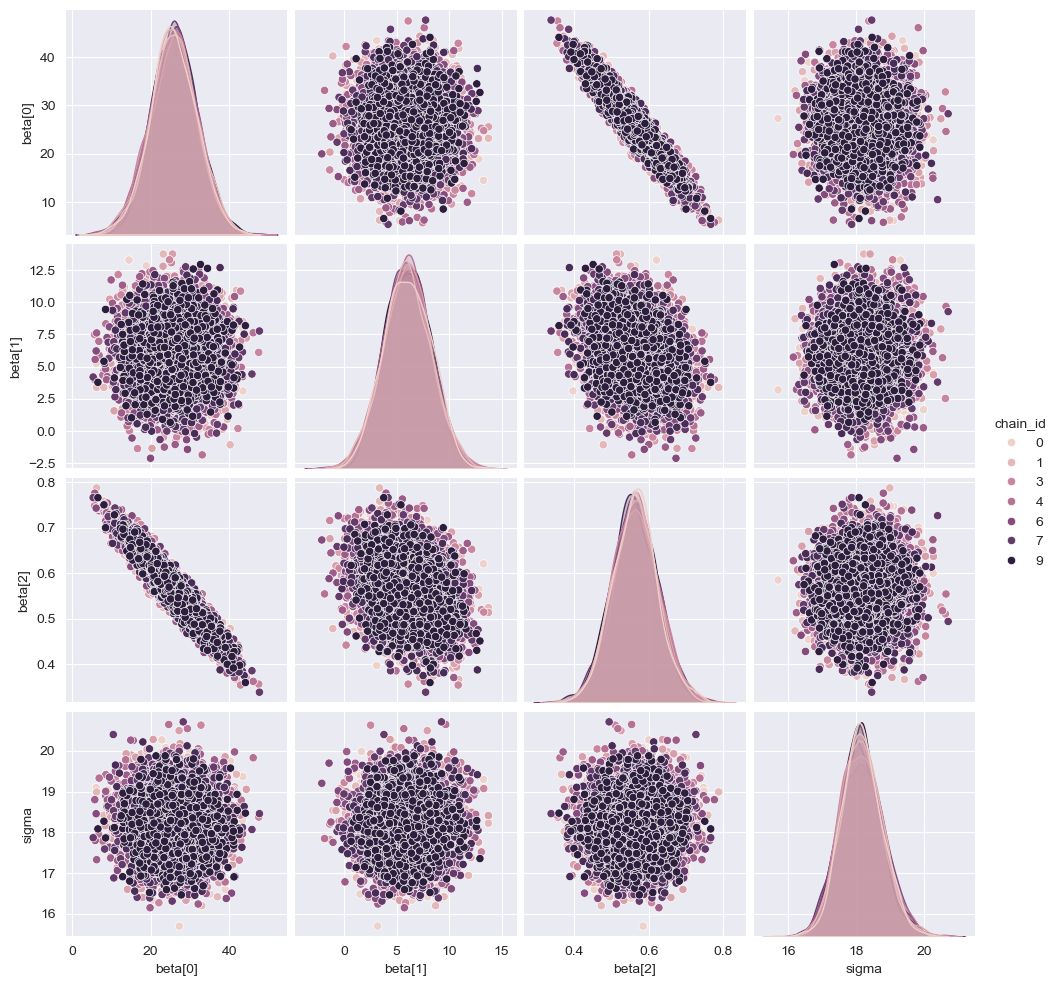

In [19]:
sns.pairplot(reference_draws_df, vars=var_cols, hue="chain_id")

In [20]:
# sns.scatterplot(reference_draws_df, x=reference_draws_df.index, y="sigma", marker='.')

In [21]:
reference_draws_df.drop(columns=["chain_id"], inplace=True)

# 2. NumPyro

See https://num.pyro.ai/en/latest/index.html

In [22]:
import numpyro
import numpyro.distributions as dist
import numpyro.infer as infer
import jax
from jax import random
import jax.numpy as jnp
from functools import partial, reduce

In [23]:
reference_draws = {
    "beta": jnp.array(reference_draws_df[["beta[0]", "beta[1]", "beta[2]"]]), 
    "sigma": jnp.array(reference_draws_df["sigma"])
}

In [24]:
data = dict(
    mom_iq=jnp.array(data_df["mom_iq"]),
    mom_hs=jnp.array(data_df["mom_hs"]),
    kid_score=jnp.array(data_df["kid_score"]),
)

## 2.1. Specifying the model

In [25]:
print(p_model.stan_code())

data {
  int<lower=0> N;
  vector<lower=0, upper=200>[N] kid_score;
  vector<lower=0, upper=200>[N] mom_iq;
  vector<lower=0, upper=1>[N] mom_hs;
}
parameters {
  vector[3] beta;
  real<lower=0> sigma;
}
model {
  sigma ~ cauchy(0, 2.5);
  kid_score ~ normal(beta[1] + beta[2] * mom_hs + beta[3] * mom_iq, sigma);
}





In [26]:
def model(mom_iq, mom_hs, kid_score=None):

    # Priors
    beta = numpyro.sample("beta", dist.ImproperUniform(dist.constraints.real_vector, (), event_shape=(3,)))
    sigma = numpyro.sample("sigma", dist.HalfCauchy(2.5))

    # Linear model
    ones = jnp.ones_like(mom_hs)
    X = jnp.stack([ones, mom_hs, mom_iq], axis=1)
    # mu = numpyro.deterministic("mu", jnp.matmul(X, beta))
    mu = jnp.matmul(X, beta)
    # mu = beta[0] + beta[1] * mom_hs + beta[2] * mom_iq

    # Observed variable
    numpyro.sample("kid_score_obs", dist.Normal(mu, sigma), obs=kid_score)

infer.inspect.render_model(model, model_args=(data["mom_iq"], data["mom_hs"]), render_distributions=True, filename=f"{os.environ['MCMC_WORKDIR']}/img/svg/model_kidiq_kidscore.svg")

In [27]:
def get_pes(param_draws):
    (beta, sigma), treedef = jax.tree.flatten(param_draws)
    
    @jax.jit
    def pe_model(beta, sigma):
        params = jax.tree.unflatten(treedef, (beta, sigma))
        log_density, _ = infer.util.log_density(model, model_args=(), model_kwargs=data, params=params)
        return -log_density
    
    pes = jax.vmap(pe_model)(beta, sigma)
    return pes

In [28]:
pe_offset = -jax.nn.logsumexp(-get_pes(reference_draws))

get_offsetted_pes = lambda param_draws: get_pes(param_draws) - pe_offset

In [29]:
ref_pes = get_offsetted_pes(reference_draws)
  
reference_draws_df["potential_energy"] = ref_pes

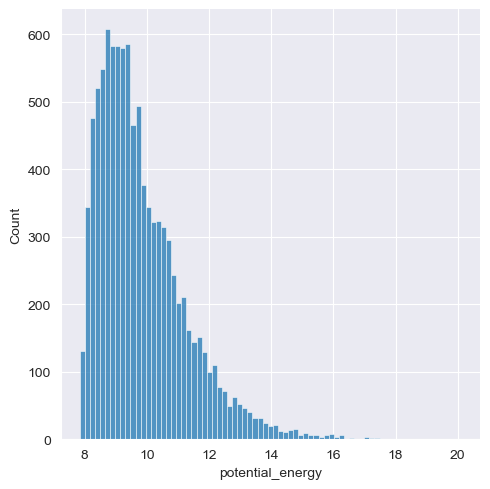

In [30]:
sns.displot(reference_draws_df, x="potential_energy")

In [31]:
ref_betas, ref_sigmas = jax.tree.leaves(reference_draws)

@jax.jit
def ecc(beta, sigma):
    ecc_beta = jnp.linalg.vector_norm(beta[None] - ref_betas, axis=1).mean(axis=0)
    ecc_sigma = jnp.abs(jnp.log(sigma)[None] - jnp.log(ref_sigmas)).mean(axis=0)
    return ecc_beta + ecc_sigma

In [32]:
ref_eccs = jax.vmap(ecc)(*jax.tree.leaves(reference_draws))
reference_draws_df["eccentricity"] = ref_eccs

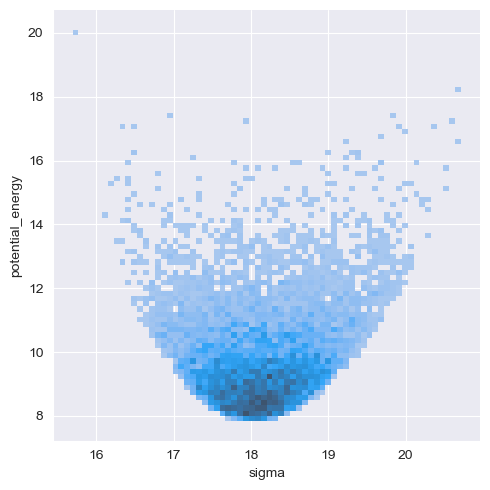

In [33]:
sns.displot(reference_draws_df, x="sigma", y="potential_energy")

<Axes: xlabel='sigma', ylabel='potential_energy'>

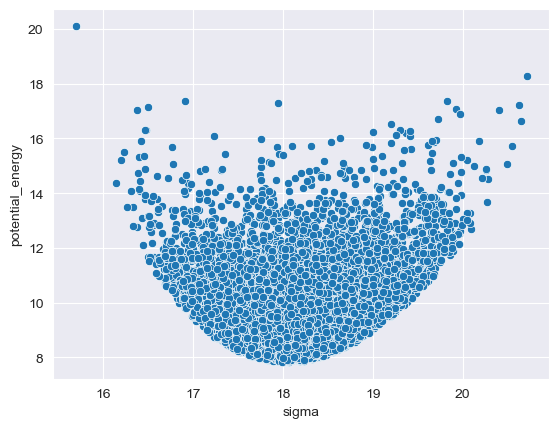

In [34]:
sns.scatterplot(reference_draws_df, x="sigma", y="potential_energy")

## 2.2. Specifying the kernel

Or use Sample Adaptive MCMC kernel from https://proceedings.neurips.cc/paper_files/paper/2019/file/2cfa8f9e50e0f510ede9d12338a5f564-Paper.pdf

In [35]:
from kernels import ARWMH, ASSS, NUTS

kernel_rwm = ARWMH(model)
kernel_sss = ASSS(model)
kernel_nuts = NUTS(model)

## 2.3 Running MCMC

In [36]:
rng_key = random.PRNGKey(0)


In [37]:
mcmc = infer.MCMC(kernel_rwm, num_warmup=0, num_samples=10000, thinning=1, progress_bar=True)
mcmc.run(rng_key, **data, extra_fields=("potential_energy",))
mcmc.print_summary()

sample: 100%|██████████| 10000/10000 [00:01<00:00, 5802.55it/s, Acceptance rate: 0.24, Step size: 1.470]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
   beta[0]     24.45      8.05     25.36     14.59     35.75     36.19      1.03
   beta[1]      5.60      2.69      5.75      1.50      9.99     79.43      1.01
   beta[2]      0.58      0.09      0.57      0.46      0.68     34.50      1.03
     sigma     18.18      1.19     18.20     17.22     19.23    616.62      1.00



In [38]:
samples = mcmc.get_samples()
pes = mcmc.get_extra_fields()["potential_energy"]

In [39]:
eccs = jax.vmap(ecc)(*jax.tree.leaves(samples))

(array([1.464e+03, 1.265e+03, 1.110e+03, 8.410e+02, 7.180e+02, 6.480e+02,
        5.340e+02, 4.550e+02, 3.860e+02, 3.300e+02, 2.900e+02, 2.650e+02,
        2.100e+02, 1.990e+02, 1.720e+02, 1.280e+02, 1.210e+02, 1.090e+02,
        1.030e+02, 9.000e+01, 6.200e+01, 7.800e+01, 5.800e+01, 5.200e+01,
        4.500e+01, 3.400e+01, 3.900e+01, 2.600e+01, 2.400e+01, 2.600e+01,
        1.800e+01, 1.800e+01, 1.500e+01, 1.000e+01, 7.000e+00, 1.100e+01,
        1.000e+01, 8.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 4.000e+00, 4.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([ 5.32929325,  5.66413784,  5.99898243,  6.33382702,  6.66867208,
         7.00351667,  7.33836126,  7.67320633,  8.00805092,  8.34289551,
         8.6777401 ,  9.01258469,  9.34742928,  9.68227386, 10.01711845,
        10.35196304, 10.68680763, 11.02165222, 11.35649681, 11.69134235,
        12.02618694, 12.36103153, 12.69587612, 13.03072071, 13.3655653 ,
        13.

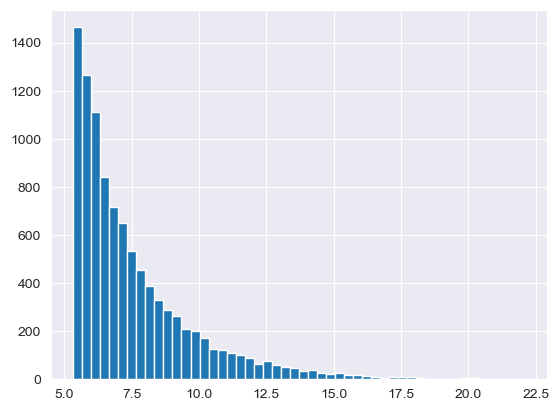

In [40]:
plt.hist(ref_eccs, bins=50)

### 2.3.1

In [41]:
mcmc = infer.MCMC(kernel_sss, num_warmup=10000, num_samples=100000, thinning=1, num_chains=1, progress_bar=True, chain_method="sequential")
rng_key = random.PRNGKey(0)

mcmc.run(rng_key,
         **data,
         extra_fields=("potential_energy",)
        )

mcmc.print_summary()

sample: 100%|██████████| 110000/110000 [00:16<00:00, 6803.15it/s, Iteration: 110000, Potential Energy: 1877.98]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
   beta[0]     25.70      5.89     25.70     16.01     35.34  88405.56      1.00
   beta[1]      5.96      2.22      5.96      2.28      9.61  87435.64      1.00
   beta[2]      0.56      0.06      0.56      0.46      0.66  87992.43      1.00
     sigma     18.15      0.62     18.13     17.13     19.17  85255.90      1.00



In [42]:
# from collections import namedtuple
# import pickle
# 
# # with open("mcmc_runs/test.pkl", "wb") as f:
# #     pickle.dump(mcmc, f)
# with open("../mcmc_runs/kidiq_kidscore/rwm/run0.pkl", "rb") as f:
#     mcmc = pickle.load(f)

In [43]:
posterior_samples = mcmc.get_samples(group_by_chain=True)
extra_fields = mcmc.get_extra_fields(group_by_chain=True)

In [44]:
posterior_samples_df = pd.concat([
    pd.DataFrame({
        "beta[0]": posterior_samples["beta"][i, :,0],
        "beta[1]": posterior_samples["beta"][i, :,1],
        "beta[2]": posterior_samples["beta"][i, :,2],
        "sigma": posterior_samples["sigma"][i],
        "potential_energy": extra_fields["potential_energy"][i],
        "step": jnp.arange(0, mcmc.num_samples, mcmc.thinning) + mcmc.thinning,
        "chain_id": i,
    })
    for i in range(mcmc.num_chains)
])
# posterior_samples_df

In [45]:
posterior_samples_df

,beta[0],beta[1],beta[2],sigma,potential_energy,step,chain_id
0,28.335737,6.627457,0.543884,19.258972,1877.009033,1,0
1,19.261585,9.033446,0.604238,18.277079,1876.066162,2,0
2,16.591124,7.577570,0.631122,17.192707,1877.819214,3,0
3,17.102839,7.619468,0.627049,17.294273,1877.252808,4,0
4,17.607985,7.735677,0.622639,17.441860,1876.677979,5,0
...,...,...,...,...,...,...,...
99995,25.707836,4.281934,0.567954,17.849911,1875.392822,99996,0
99996,38.822533,2.380204,0.467926,17.492064,1879.053955,99997,0
99997,30.657915,4.325894,0.527410,17.173996,1876.261475,99998,0
99998,31.638300,4.265004,0.519396,17.203430,1876.366577,99999,0


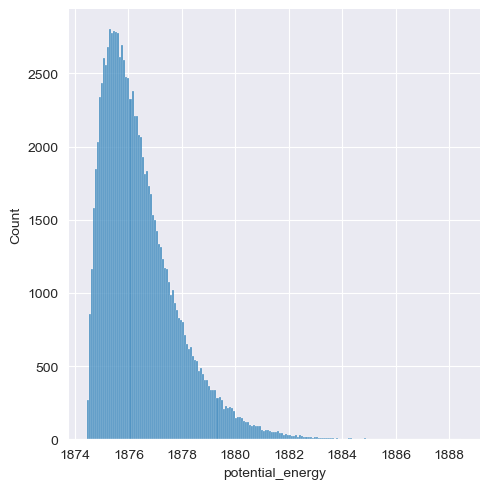

In [46]:
sns.displot(posterior_samples_df, x="potential_energy")

<Axes: xlabel='step', ylabel='potential_energy'>

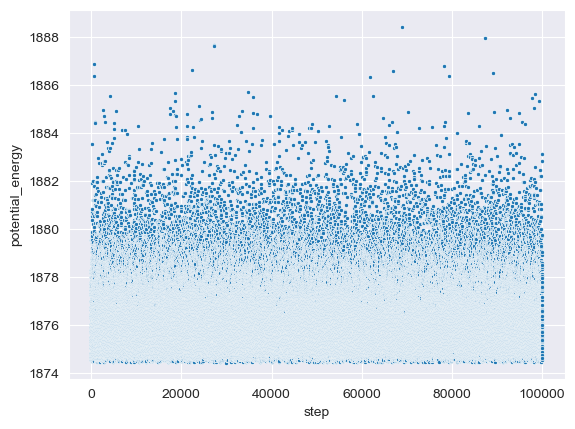

In [47]:
sns.scatterplot(posterior_samples_df, x="step", y="potential_energy", marker='.')
# plt.semilogy()
# plt.semilogx()
# plt.xlabel("Step")


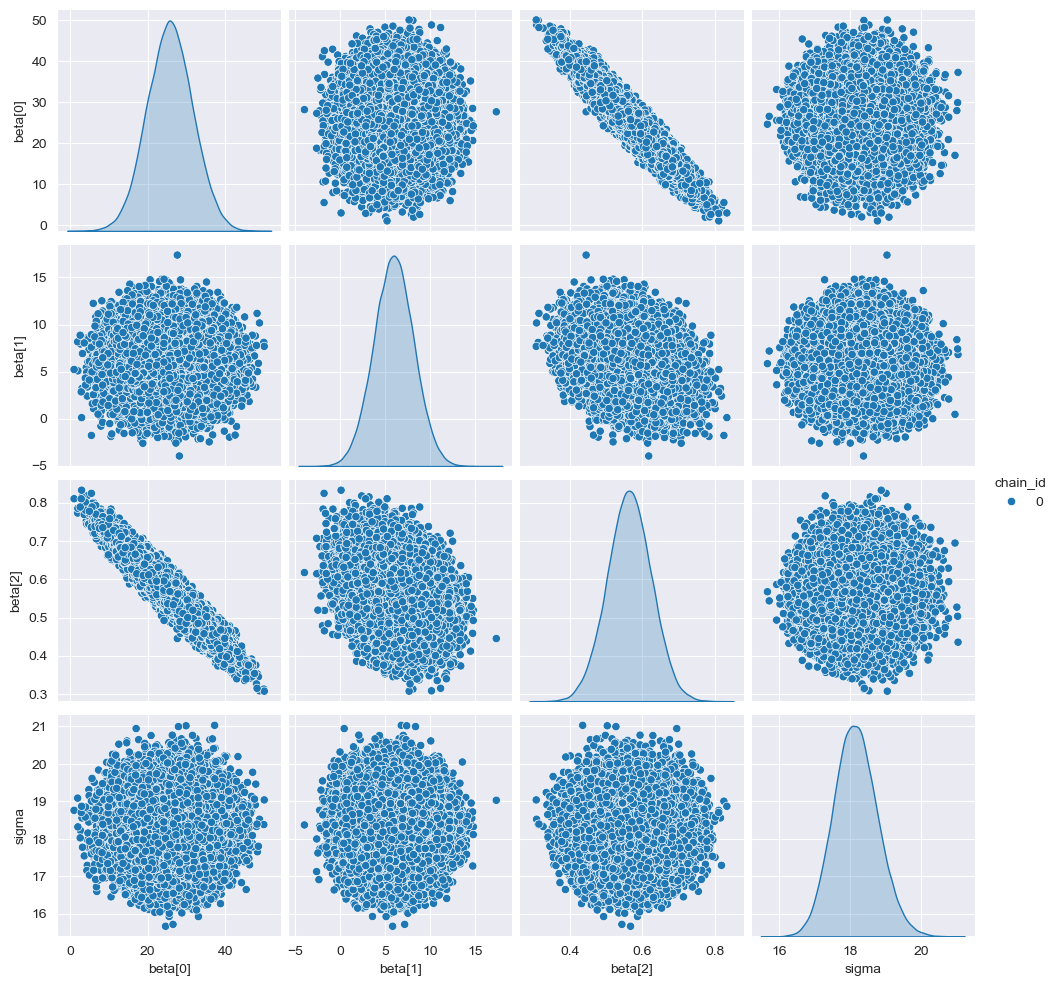

In [48]:
sns.pairplot(posterior_samples_df, vars=["beta[0]", "beta[1]", "beta[2]", "sigma"], hue="chain_id")

<Axes: xlabel='step', ylabel='sigma'>

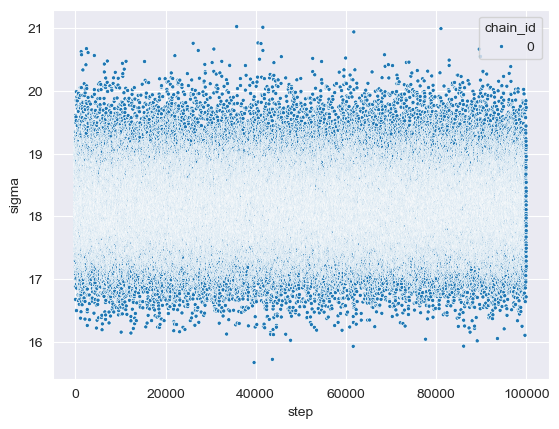

In [49]:
sns.scatterplot(posterior_samples_df, x="step", y="sigma", marker='.', hue="chain_id")
# plt.xlabel("Step")

### 2.3.2. PE

Array(1869.5087, dtype=float32)

In [51]:
import pickle
def open_pes(algo, decay):
    for i in range(100):
        with open(f"{os.environ['MCMC_WORKDIR']}/python/mcmc_runs/lr_decay/kidiq_kidscore/{algo}/{decay}/run{i}.pkl",
                  "rb") as f:
            states = pickle.load(f)
            yield states.potential_energy

In [52]:
pes_rwm = dict(
    pes1 = jnp.stack(list(open_pes("rwm", "1"))),
    pes2_3 = jnp.stack(list(open_pes("rwm", "2_3"))),
    pes1_2 = jnp.stack(list(open_pes("rwm", "1_2"))),
)
print(jnp.abs(pes_rwm["pes1_2"]).min())

1874.4451


In [53]:
from utils.kernel_utils import ns_logscale, collect_states_logscale

ns = ns_logscale(6)

[]

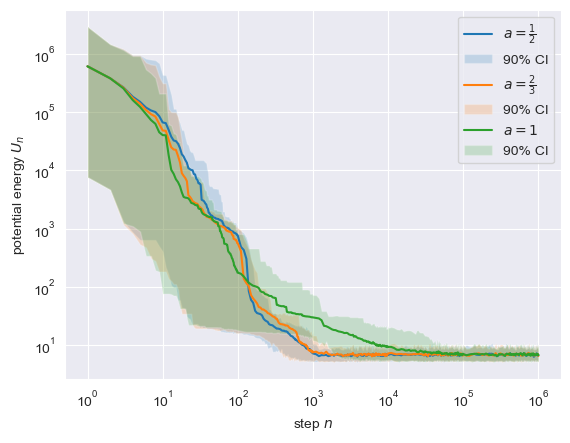

In [130]:
for a, a_l, pes in [
    (1/2, r"\frac{1}{2}", pes_rwm["pes1_2"]), 
    (2/3, r"\frac{2}{3}", pes_rwm["pes2_3"]), 
    (1, "1", pes_rwm["pes1"])
]:
    pes -= pe_offset

    pes_mean= pes.mean(axis=0)
    ci_l = jnp.quantile(pes, 0.05, axis=0)
    ci_u = jnp.quantile(pes, 0.95, axis=0)
    
    plt.plot(ns, pes_mean, label=rf"$a={a_l}$")
    plt.fill_between(ns, ci_l, ci_u, alpha=0.2, label="90% CI")
    
# plt.plot(ns, 1 / jnp.sqrt(ns), "--", color="gray", label=r"$n^{-\frac{1}{2}}$")

plt.xlabel(r"step $n$")
plt.ylabel(r"potential energy $U_n$")

plt.legend()

plt.semilogy()
plt.semilogx()

# plt.savefig(svg_dir + "rwm-pe-lr-kidiq.svg", format="svg")
# plt.savefig(png_dir + "rwm-pe-lr-kidiq.png", format="png", dpi=300)

### 2.3.3 Adaptation

In [50]:
svg_dir = f"{os.environ['MCMC_WORKDIR']}/img/svg/"

In [ ]:
import jax
from functools import partial
from numpyro.util import fori_collect


rng_key = random.PRNGKey(0)
r_keys = random.split(rng_key, 100)

pow = 6
ns = jnp.concat([jnp.arange(0 if p < 1 else 10**(p-1), 10**p, 10**(max(0, p-2) )) + 10**(max(0, p-2)) for p in range(pow+1)])

def get_rwm_a_diffs(rng_key, a):
    sampler = ARWMH(model, lr_decay=a)
    init_state = sampler.init(rng_key, num_warmup=0, init_params={}, model_args=(), model_kwargs=data)
    step_fn = partial(sampler.sample, model_args=(), model_kwargs=data)

    diffs_int = lambda p: fori_collect(0 if p < 1 else 10**(p-1), 10**p, step_fn, init_state, thinning=10**( max(0, p-2) ), progbar=False).as_change
    return jnp.concat([diffs_int(p) for p in range(pow+1)])

def get_sss_a_diffs(rng_key, a):
    sampler = ASSS(model, lr_decay=a)
    init_state = sampler.init(rng_key, num_warmup=0, init_params={}, model_args=(), model_kwargs=data)
    step_fn = partial(sampler.sample, model_args=(), model_kwargs=data)

    diffs_int = lambda p: fori_collect(0 if p < 1 else 10**(p-1), 10**p, step_fn, init_state, thinning=10**( max(0, p-2) ), progbar=False).as_change
    return jnp.concat([diffs_int(p) for p in range(pow+1)])

In [ ]:
diffs_rwm = dict(
    diffs1 = jax.lax.map(lambda r_key: get_rwm_a_diffs(r_key, 1), r_keys),
    diffs2_3 = jax.lax.map(lambda r_key: get_rwm_a_diffs(r_key, 2/3), r_keys),
    diffs1_2 = jax.lax.map(lambda r_key: get_rwm_a_diffs(r_key, 1/2), r_keys),
)
print(jnp.abs(diffs_rwm["diffs1_2"]).max())

In [ ]:
for a, a_l, diffs in [
    (1/2, r"\frac{1}{2}", diffs_rwm["diffs1_2"]), 
    (2/3, r"\frac{2}{3}", diffs_rwm["diffs2_3"]), 
    (1, "1", diffs_rwm["diffs1"])
]:

    diffs_mean= diffs.mean(axis=0)
    ci_l = jnp.quantile(diffs, 0.05, axis=0)
    ci_u = jnp.quantile(diffs, 0.95, axis=0)
    
    plt.plot(ns, diffs_mean, label=rf"$a={a_l}$")
    plt.fill_between(ns, ci_l, ci_u, alpha=0.2, label="90% CI")
    
plt.plot(ns, 1 / jnp.sqrt(ns), "--", color="gray", label=r"$n^{-\frac{1}{2}}$")

plt.xlabel(r"step $n$")
plt.ylabel(r"adaptation changes $d_n$")

plt.legend(loc="lower left")

plt.semilogy()
plt.semilogx()

plt.savefig(svg_dir + "rwm-adaptation-lr-kidiq.svg", format="svg")
# plt.savefig(png_dir + "rwm-adaptation-lr-kidiq.png", format="png", dpi=300)

In [ ]:
diffs_sss = dict(
    diffs1 = jax.lax.map(lambda r_key: get_sss_a_diffs(r_key, 1), r_keys),
    diffs2_3 = jax.lax.map(lambda r_key: get_sss_a_diffs(r_key, 2/3), r_keys),
    diffs1_2 = jax.lax.map(lambda r_key: get_sss_a_diffs(r_key, 1/2), r_keys),
)
print(jnp.abs(diffs_sss["diffs1_2"]).max())

In [ ]:
for a, a_l, diffs in [
    (1/2, r"\frac{1}{2}", diffs_sss["diffs1_2"]), 
    (2/3, r"\frac{2}{3}", diffs_sss["diffs2_3"]), 
    (1, "1", diffs_sss["diffs1"])
]:
    diffs_mean= diffs.mean(axis=0)
    ci_l = jnp.quantile(diffs, 0.05, axis=0)
    ci_u = jnp.quantile(diffs, 0.95, axis=0)
    
    plt.plot(ns, diffs_mean, label=rf"$a={a_l}$")
    plt.fill_between(ns, ci_l, ci_u, alpha=0.2, label="90% CI")
    
plt.plot(ns, 1 / jnp.sqrt(ns), "--", color="gray", label=r"$n^{-\frac{1}{2}}$")

plt.xlabel(r"step $n$")
plt.ylabel(r"adaptation changes $d_n$")

plt.legend(loc="lower left")

plt.semilogy()
plt.semilogx()

plt.savefig(svg_dir + "sss-adaptation-lr-kidiq.svg", format="svg")
# plt.savefig(png_dir + "sss-adaptation-lr-kidiq.png", format="png", dpi=300)


### 2.3.4 Ecc

In [1]:
import pickle
def open_eccs(algo, decay):
    for i in range(100):
        with open(f"{os.environ['MCMC_WORKDIR']}/python/mcmc_runs/lr_decay/kidiq_kidscore/{algo}/{decay}/run{i}.pkl",
                  "rb") as f:
            states = pickle.load(f)
            leaves = jax.tree.leaves(states.z)
            eccs = vmap(ecc)(*leaves)
            yield eccs

### 2.3.* Prediction

In [63]:
mom_iq= jnp.concat([jnp.arange(70, 140)] * 2)
mom_hs= jnp.concat([jnp.zeros(70), jnp.ones(70)])
kid_score=data["kid_score"]
rng_key = random.PRNGKey(0)

predictive = infer.Predictive(model, posterior_samples=posterior_samples)

kid_score_pred = predictive(rng_key, mom_iq=mom_iq, mom_hs=mom_hs)["kid_score_obs"]

kid_score_pred_mean = kid_score_pred.mean(axis=0)
hdpi = numpyro.diagnostics.hpdi(kid_score_pred, prob=0.9)

NameError: name 'posterior_samples' is not defined

In [ ]:
idx = jnp.argsort(mom_iq)

idx_0 = idx[mom_hs[idx] == 0]
idx_1 = idx[mom_hs[idx] == 1]

In [ ]:
fig, (ax_0, ax_1) = plt.subplots(1, 2, figsize=(10,5), sharex=True, sharey=True)

ax_0.plot(mom_iq[idx_0], kid_score_pred_mean[idx_0], ls='-', color="black", label="prediction")
ax_0.fill_between(mom_iq[idx_0], hdpi[0, idx_0], hdpi[1, idx_0], alpha=0.3, color="gray", label="90% HDPI")
# ax_0.scatter(data[mom_iq[idx_0], kid_score[idx_0], marker='x', color="darkred", label="data")
ax_0.set_xlabel("mom_iq")
ax_0.set_ylabel("kid_score")
ax_0.set_title("mom_hs = 0")

fig.legend(loc='center')

ax_1.plot(mom_iq[idx_1], kid_score_pred_mean[idx_1], ls='-', color="black", label="prediction")
ax_1.fill_between(mom_iq[idx_1], hdpi[0, idx_1], hdpi[1, idx_1], alpha=0.3, color="gray", label="90% HDPI")
# ax_1.scatter(mom_iq[idx_1], kid_score[idx_1], marker='x', color="darkred", label="data")
ax_1.set_title("mom_hs = 1")
ax_1.set_xlabel("mom_iq")

# 3. Evaluation

In [ ]:
combined_df = pd.concat([
    reference_draws_df[var_cols].assign(source = "reference"),
    posterior_samples_df[var_cols].assign(source = "samples"),
])

In [ ]:
sns.pairplot(combined_df, vars=var_cols, hue="source", markers=".")

In [ ]:
sns.displot(combined_df, x="sigma", hue="source")

## 3.1. Moments

In [ ]:
p = 2

pth_moments = combined_df.groupby("source").aggregate(lambda vals: np.mean(vals**p)).transpose().rename_axis(f"E[|X|^{p}]")
pth_moments["% diff"] = np.abs(pth_moments["reference"] - pth_moments["samples"])/(pth_moments["reference"])*100

pth_moments

## 3.2. Wasserstein-1 Distance

$$ \mathcal{W}(u, v) = \inf_{\xi \in \mathcal{C} (u, v)} \int \| x-y \|_2 \xi (dx,dy) $$


In [ ]:
from utils.evaluation import wasserstein_dist11_p

wasserstein_dist11_p(jnp.array(posterior_samples_df[var_cols]), jnp.array(reference_draws_df[var_cols]))

In [ ]:
from scipy.stats import wasserstein_distance_nd
from jax import vmap, jit

from ott.geometry import pointcloud, costs
from ott.solvers import linear

In [ ]:
# Computing optimal 1-1 coupling

def wasserstein_disc11_p(u_values, v_values, p=2):

    cost_matrix = distance_matrix(u_values, v_values, p=p)
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    opt_cost = cost_matrix[row_ind, col_ind].mean().item()
    return opt_cost
    

def wasserstein_disc11_d(u_values, v_values, dist_fn):

    dist_vmap = vmap(lambda x: vmap(lambda y: dist_fn(x, y))(v_values), in_axes=(0,))

    cost_matrix = dist_vmap(u_values)
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    opt_cost = cost_matrix[row_ind, col_ind].mean().item()
    return opt_cost

In [ ]:
def wasserstein_distance_ot(u_values, v_values):
    geom = pointcloud.PointCloud(x=u_values, y=v_values, cost_fn=costs.Euclidean())
    solve_fn = jit(linear.solve)
    ot = solve_fn(geom)
    return ot.primal_cost.item()

In [ ]:
n = 1000
x=jnp.array(posterior_samples_df)[:n]
y=jnp.array(reference_draws_df)[:n]

In [ ]:
geom = pointcloud.PointCloud(x=x, y=y, cost_fn=costs.Euclidean())
solve_fn = jit(linear.solve)
ot = solve_fn(geom)

print(
    " Sinkhorn has converged: ",
    ot.converged,
    "\n",
    "Error upon last iteration: ",
    ot.errors[(ot.errors > -1)][-1],
    "\n",
    "Sinkhorn required ",
    jnp.sum(ot.errors > -1),
    " iterations to converge. \n",
    "Entropy regularized OT cost: ",
    ot.ent_reg_cost,
    "\n",
    "OT cost (without entropy): ",
    jnp.sum(ot.matrix * ot.geom.cost_matrix),
)

In [ ]:
%%time

wasserstein_distance_ot(x, y)

In [ ]:
def wasserstein_1d(mu, nu, p=2.0):
    """
    Compute the 1D Wasserstein distance between two arrays.
    
    Parameters:
    - mu, nu: 1D arrays.
    
    Returns:
    - float: The Wasserstein distance in 1D.
    """

    # Compute the absolute differences
    diff = jnp.abs(jnp.sort(mu) - jnp.sort(nu))
    
    # Raise to the power of p
    diff_p = diff ** p
    
    # Compute the p-th root of the sum of differences to the power p
    return jnp.power(jnp.mean(diff_p), 1.0 / p)


def max_sliced_wasserstein(mu, nu, rng_key, p=2.0, n_directions=1000):
    """
    Approximate the Wasserstein distance using the max-sliced approach with JAX.

    Parameters:
    - mu, nu: jnp.arrays of shape (n_samples, n_dimensions) representing 
              points sampled from two distributions.
    - key: JAX PRNG key for randomness.
    - n_directions: Number of random directions to project onto.

    Returns:
    - float: An approximation of the Wasserstein distance.
    """
    n_dim = mu.shape[1]
    
    # Generate random directions on the unit sphere
    directions = random.normal(rng_key, (n_directions, n_dim))
    directions = directions / jnp.linalg.norm(directions, axis=1, keepdims=True)
    
    # Vectorizing projection and 1D Wasserstein computation over directions
    project_and_compute = vmap(lambda dir: wasserstein_1d(
        jnp.dot(mu, dir),
        jnp.dot(nu, dir),
        p=p
    ))
    
    distances = project_and_compute(directions)
    
    return jnp.max(distances)

In [ ]:
%%time

rng_key, key_wasserstein = random.split(rng_key, 2)
max_sliced_wasserstein(x, y, key_wasserstein, n_directions=10000).item()

In [ ]:
%%time

wasserstein_distance_nd(x, y)

In [ ]:
%%time

wasserstein_distance_nd(x, y)

## 3.3. Maximum Mean Discrepancy

Given a symmetric, positive-definite kernel kernel $k(\cdot,\cdot): \mathcal{X} \times \mathcal{X} \to \mathbb{R}$,
the MMD between distributions $P$ and $Q$ is given by

$$ MMD(P, Q)^2 = \int_{\mathcal{X} \times \mathcal{X}} k(x, x') P(dx)P(dx') + \int_{\mathcal{X} \times \mathcal{X}} k(y, y') Q(dy)Q(dy') - 2\int_{\mathcal{X} \times \mathcal{X}} k(x, y) P(dx)Q(dy) $$

Usually Gaussian kernel is used with

$$ k(x,y) := \exp \left( -\frac{\| x-y \|^2}{ \ell^2 } \right) $$.


In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

def mmd(p, q, l=1.0):
    P = rbf_kernel(p, gamma=1/l**2)
    Q = rbf_kernel(q, gamma=1/l**2)
    PQ = rbf_kernel(p, q, gamma=1/l**2)
    mmd = np.sqrt(np.mean(P) + np.mean(Q) - 2*np.mean(PQ))
    return mmd

In [ ]:
%%time
mmd(posterior_samples_df.values, reference_draws_df.values).item()

## 3.4. Pareto-$\hat{k}$ diagnostic

See https://arxiv.org/abs/1507.02646

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette(sns.color_palette("deep")[3:6])

In [2]:
df_eval = pd.concat([
    pd.read_csv(
        f"{os.environ['MCMC_WORKDIR']}/python/mcmc_runs/w_eval/kidiq_kidscore/eval_{algo}.csv",
        usecols=["rng_seed", "rmse_means", "wasserstein", "mmd"]
    ).assign(algorithm=(algo if algo=="nuts" else "a"+algo))
    for algo in ["rwm", "sss", "nuts"]
]).set_index(["algorithm", "rng_seed"])

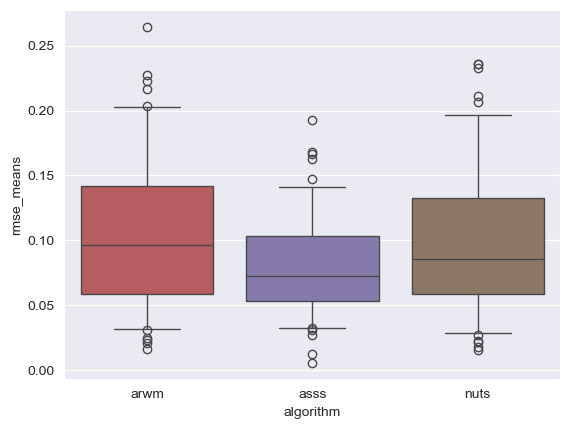

In [53]:
sns.boxplot(df_eval, x="algorithm", y="rmse_means", hue="algorithm", whis=[5,95])
# sns.stripplot(df_eval, x="algorithm", y="moment_rmse", size=3, hue="algorithm", alpha=0.5)
plt.savefig(svg_dir + "rmse-eval-kidiq.svg", format="svg")

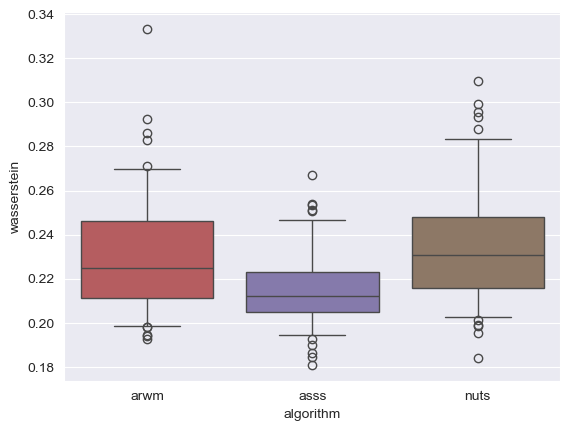

In [54]:
sns.boxplot(df_eval, x="algorithm", y="wasserstein", hue="algorithm", whis=[5,95])
# sns.stripplot(df_eval, x="algorithm", y="moment_rmse", size=3, hue="algorithm", alpha=0.5)
plt.savefig(svg_dir + "wasserstein-eval-kidiq.svg", format="svg")

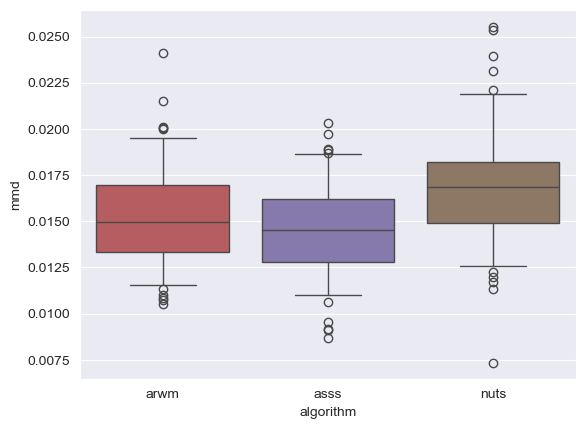

In [55]:
sns.boxplot(df_eval, x="algorithm", y="mmd", hue="algorithm", whis=[5,95])
# sns.stripplot(df_eval, x="algorithm", y="moment_rmse", size=3, hue="algorithm", alpha=0.5)
plt.savefig(svg_dir + "mmd-eval-kidiq.svg", format="svg")

In [3]:
df_eval_agg = df_eval.groupby(by=["algorithm"]).agg(["mean", "std"])
df_eval_agg

rmse_means           wasserstein                 mmd          
                mean       std        mean       std      mean       std
algorithm                                                               
arwm        0.105528  0.055842    0.230111  0.025620  0.015367  0.002694
asss        0.079964  0.036879    0.214227  0.015919  0.014555  0.002361
nuts        0.096859  0.052896    0.233874  0.024490  0.016767  0.003006